# The Bigger Picture
Show the mechanisms at play. First, how does the model mean response work?

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import unixFunctionsMITgcm_final as fc
import pandas as pd

In [2]:
#Reading the data.
full='/data/hpcdata/users/grejan/mitgcm/data'
total={}
units={}
longnames={}
#from unixFunctionsMITgcm_final import read_all_data
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='isotherm')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='final')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='ohc')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='seaice')
total, units, longnames=fc.read_all_data(full, total, units, longnames, kind='trough')

/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:431: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  total[var]=pd.DataFrame(data=ts.values.T, columns=names, index=ts.indexes['time'].to_datetimeindex())
/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:439: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  total[varb]=pd.DataFrame(data=ts.values.T, columns=names, index=ts.indexes['time'].to_datetimeindex())
/data/hpcdata/users/grejan/mitgcm/unixFunctionsMITgcm_final.py:447: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standa

Correlation:


0.9415893269185261

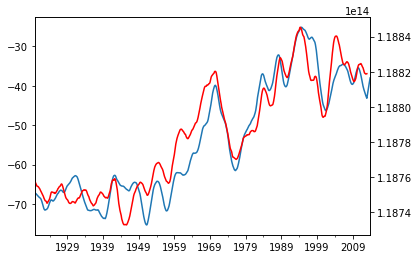

In [3]:
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot()
plt.twinx()
total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'].plot(c='r')

print('Correlation:')
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].corr(total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])

<AxesSubplot:>

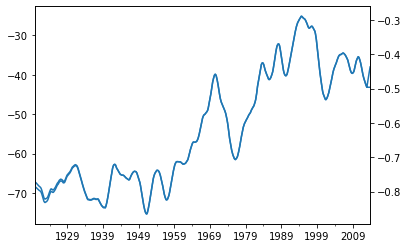

In [4]:
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot()
plt.twinx()
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'].plot()

ens01
0    0.41232
Name: ens01, dtype: float64
ens02
0    0.569881
Name: ens02, dtype: float64
ens03
0    0.568036
Name: ens03, dtype: float64
ens04
0    0.335797
Name: ens04, dtype: float64
ens05
0    0.272531
Name: ens05, dtype: float64
ens06
0    0.39933
Name: ens06, dtype: float64
ens07
0    0.741279
Name: ens07, dtype: float64
ens08
0    0.243901
Name: ens08, dtype: float64
ens09
0    0.686768
Name: ens09, dtype: float64
ens10
0    0.794655
Name: ens10, dtype: float64
ens11
0    0.779712
Name: ens11, dtype: float64
ens12
0    0.829013
Name: ens12, dtype: float64
ens13
0    0.527021
Name: ens13, dtype: float64
ens14
0    0.703792
Name: ens14, dtype: float64
ens15
0    0.571339
Name: ens15, dtype: float64
ens16
0    0.795854
Name: ens16, dtype: float64
ens17
0    0.681582
Name: ens17, dtype: float64
ens18
0    0.748336
Name: ens18, dtype: float64
ens19
0    0.637127
Name: ens19, dtype: float64
ens20
0    0.674095
Name: ens20, dtype: float64


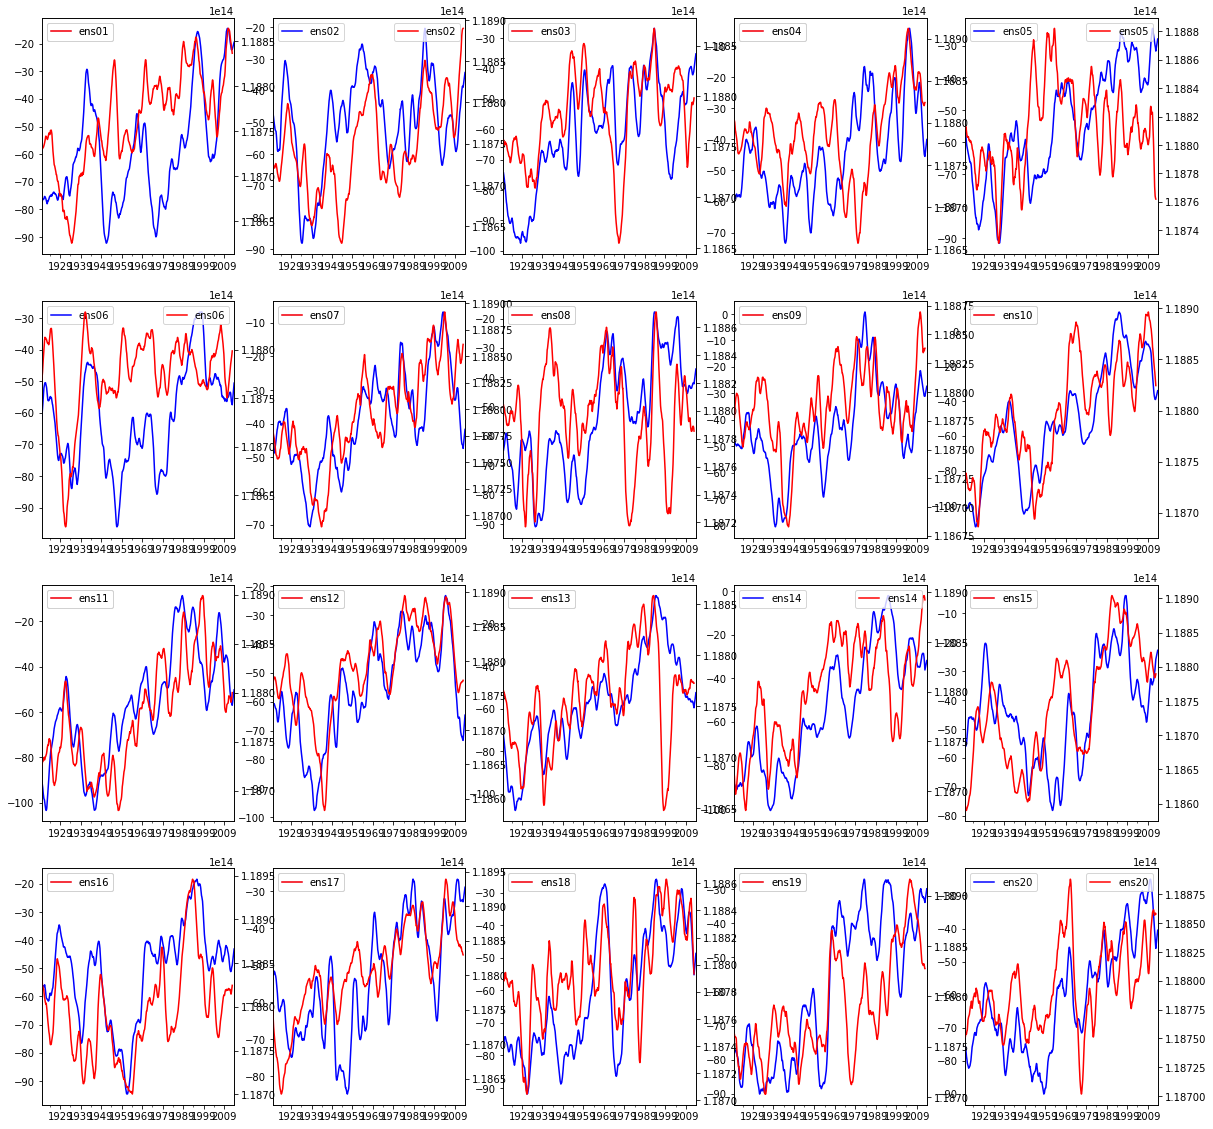

In [53]:
total['amundsen_shelf_break_uwind_avg'] = total['amundsen_shelf_break_uwind_avg'].reindex(sorted(total['amundsen_shelf_break_uwind_avg'].columns), axis=1)
total['amundsen_shelf_ohc_below_0m'] = total['amundsen_shelf_ohc_below_0m'].reindex(sorted(total['amundsen_shelf_ohc_below_0m'].columns), axis=1)

fig, ax=plt.subplots(4,5, figsize=(20,20))
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
total['amundsen_shelf_ohc_below_0m'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax1, color='r')

cors=pd.DataFrame()
for i in total['amundsen_shelf_break_uwind_avg']:
    a=total['amundsen_shelf_break_uwind_avg'][i].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013']
    b=total['amundsen_shelf_ohc_below_0m'][i].rolling(24, center=True).mean()['1920':'2013']
    print(i)
    cors[i]=[a.corr(b)]
    print(cors[i])
    

With Convection


with   without      diff
ens01  0.412320  0.449846  0.037526
ens02  0.569881  0.494611 -0.075270
ens03  0.568036  0.693687  0.125651
ens04  0.335797  0.757643  0.421846
ens05  0.272531  0.302420  0.029888
ens06  0.399330  0.243028 -0.156302
ens07  0.741279  0.812708  0.071430
ens08  0.243901  0.249068  0.005167
ens09  0.686768  0.618971 -0.067797
ens10  0.794655  0.695106 -0.099549
ens11  0.779712  0.597855 -0.181858
ens12  0.829013  0.828483 -0.000530
ens13  0.527021  0.870546  0.343525
ens14  0.703792  0.350075 -0.353717
ens15  0.571339  0.816542  0.245204
ens16  0.795854  0.796624  0.000771
ens17  0.681582  0.775973  0.094391
ens18  0.748336  0.711686 -0.036650
ens19  0.637127  0.694134  0.057007
ens20  0.674095  0.696034  0.021939

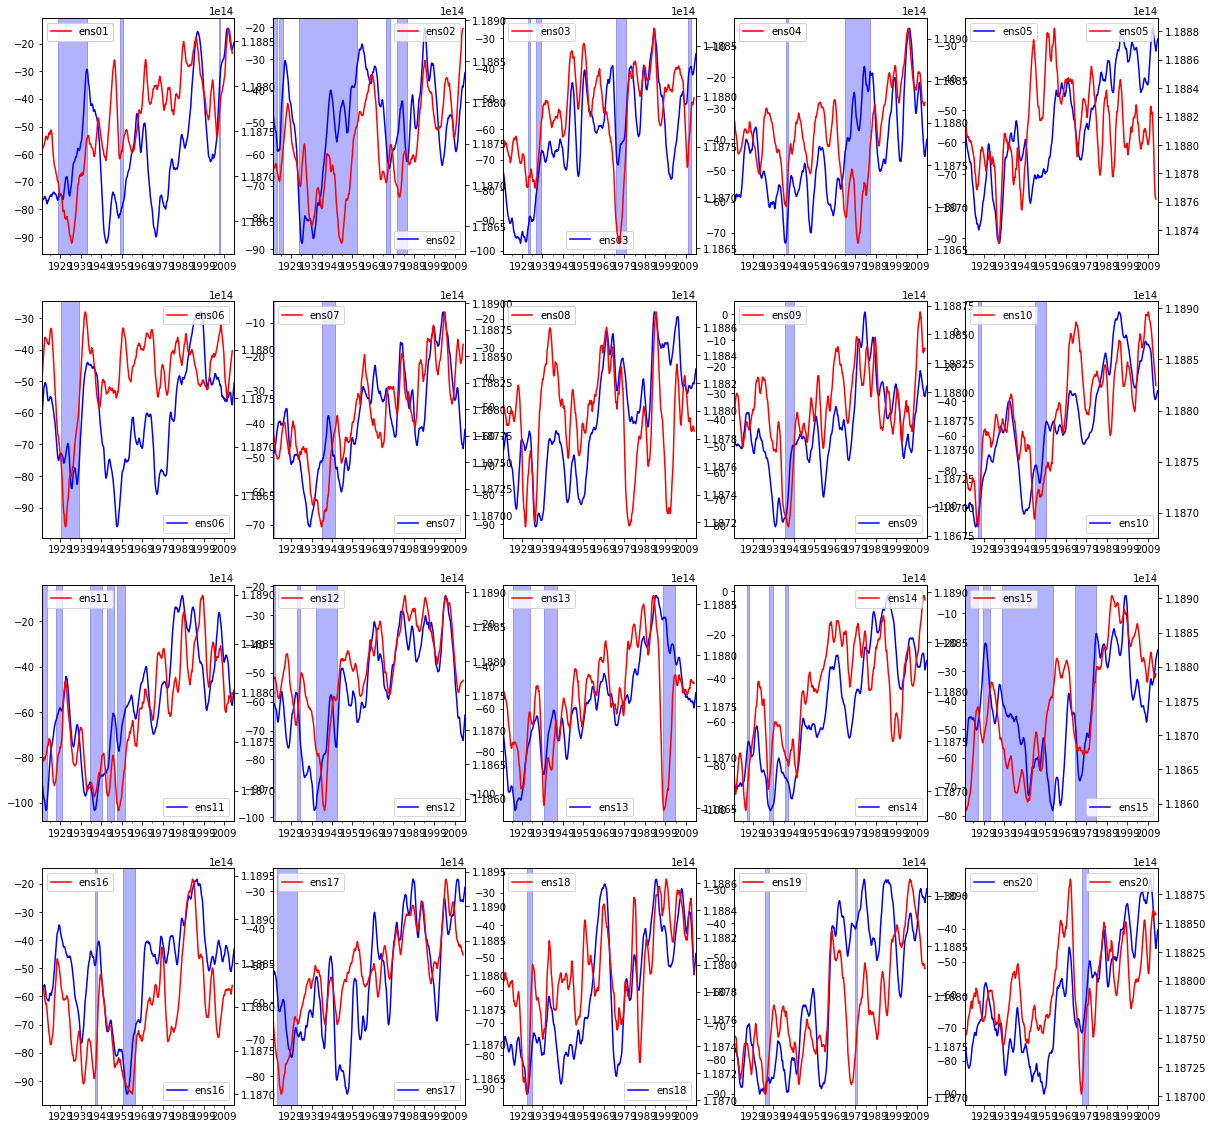

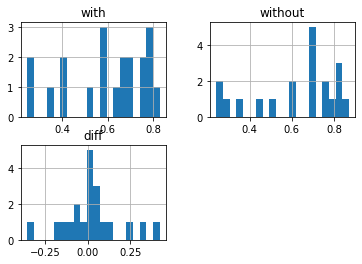

In [25]:
total['amundsen_shelf_break_uwind_avg'] = total['amundsen_shelf_break_uwind_avg'].reindex(sorted(total['amundsen_shelf_break_uwind_avg'].columns), axis=1)
total['amundsen_shelf_ohc_below_0m'] = total['amundsen_shelf_ohc_below_0m'].reindex(sorted(total['amundsen_shelf_ohc_below_0m'].columns), axis=1)

fig, ax=plt.subplots(4,5, figsize=(20,20))
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
total['amundsen_shelf_ohc_below_0m'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax1, color='r')


choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    #total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']

k=0
for i in range(1,21):
    sel=convection['ens'+str(i).zfill(2)]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    ax[int(np.floor(i/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    ax[int(np.floor((i-1)/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)

                    
print('With Convection')
cors=pd.DataFrame()
cors['with']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].corrwith(
    total['amundsen_shelf_ohc_below_0m'].rolling(24, center=True).mean()['1920':'2013'])
cors['without']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].corrwith(
    total['amundsen_shelf_ohc_below_0m'][convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013'])
cors['diff']=cors['without']-cors['with']

cors.hist(bins=20)
cors

In [73]:
convection = convection.reindex(sorted(convection.columns), axis=1)

#print(convection.sum().sort_values())

#print(cors[convection.columns[convection.sum()==0]])
#print(cors[convection.columns[convection.sum()>0]])

ens08      0
ens05      1
ens18     33
ens20     35
ens19     37
ens14     52
ens09     55
ens10     81
ens16     84
ens07     87
ens06    106
ens17    120
ens03    121
ens04    158
ens12    162
ens01    191
ens11    222
ens13    253
ens02    469
ens15    546
dtype: int64
      ens08
0  0.243901
     ens01     ens02     ens03     ens04     ens05    ens06     ens07  \
0  0.41232  0.569881  0.568036  0.335797  0.272531  0.39933  0.741279   

      ens09     ens10     ens11     ens12     ens13     ens14     ens15  \
0  0.686768  0.794655  0.779712  0.829013  0.527021  0.703792  0.571339   

      ens16     ens17     ens18     ens19     ens20  
0  0.795854  0.681582  0.748336  0.637127  0.674095  


In [ ]:
total['amundsen_shelf_break_uwind_avg'] = total['amundsen_shelf_break_uwind_avg'].reindex(sorted(total['amundsen_shelf_break_uwind_avg'].columns), axis=1)
total['PITE'] = total['PITE'].reindex(sorted(total['PITE'].columns), axis=1)

fig, ax=plt.subplots(4,5, figsize=(20,20))
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
total['amundsen_shelf_ohc_below_0m'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax1, color='r')

cors=pd.DataFrame()
for i in total['amundsen_shelf_break_uwind_avg']:
    a=total['amundsen_shelf_break_uwind_avg'][i].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013']
    b=total['PITE'][i].rolling(24, center=True).mean()['1920':'2013']
    print(i)
    cors[i]=[a.corr(b)]
    print(cors[i])
    

Correlation:
0.5045128888512073


<AxesSubplot:>

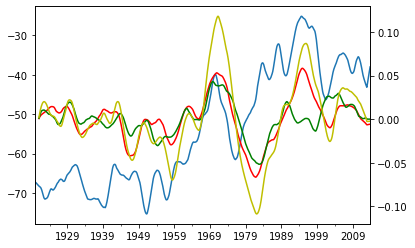

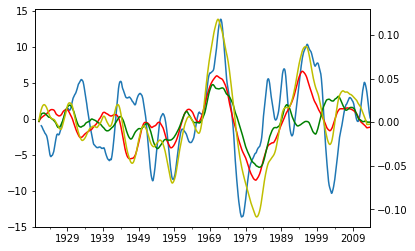

In [120]:
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot()
plt.twinx()
(-1*total['PITE'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='r')
(-1*total['Burke'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='g')
(total['BRE'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='y')

print('Correlation:')
a=(total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean()-total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(25*12, min_periods=5*12, center=True).mean()).ewm(halflife=12*5).sum()['1920':'2013']
b=(-1*total['PITE'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013'])
print(a.corr(b.shift(-18)))

plt.figure()
a.shift(20).plot()
plt.twinx()
(-1*total['PITE'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='r')
(-1*total['Burke'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='g')
(total['BRE'].mean(axis=1).ewm(halflife=12*5).sum()['1920':'2013']).plot(c='y')

With Convection


with   without      diff
ens01 -0.403647 -0.328248  0.075399
ens02 -0.585064 -0.236927  0.348137
ens03 -0.447500 -0.389791  0.057710
ens04  0.025572 -0.410273 -0.435844
ens05 -0.061116 -0.302331 -0.241215
ens06 -0.155533 -0.029206  0.126327
ens07 -0.301054 -0.316392 -0.015338
ens08  0.048483  0.017605 -0.030878
ens09 -0.453915 -0.252425  0.201490
ens10 -0.669743 -0.536165  0.133578
ens11 -0.646363 -0.563965  0.082398
ens12 -0.667598 -0.677019 -0.009421
ens13 -0.442176 -0.611758 -0.169582
ens14 -0.501343  0.136939  0.638282
ens15 -0.453274 -0.281245  0.172028
ens16 -0.652291 -0.675056 -0.022764
ens17 -0.450458 -0.398548  0.051911
ens18 -0.316652 -0.171958  0.144694
ens19 -0.454524 -0.568291 -0.113767
ens20 -0.451766 -0.471783 -0.020016

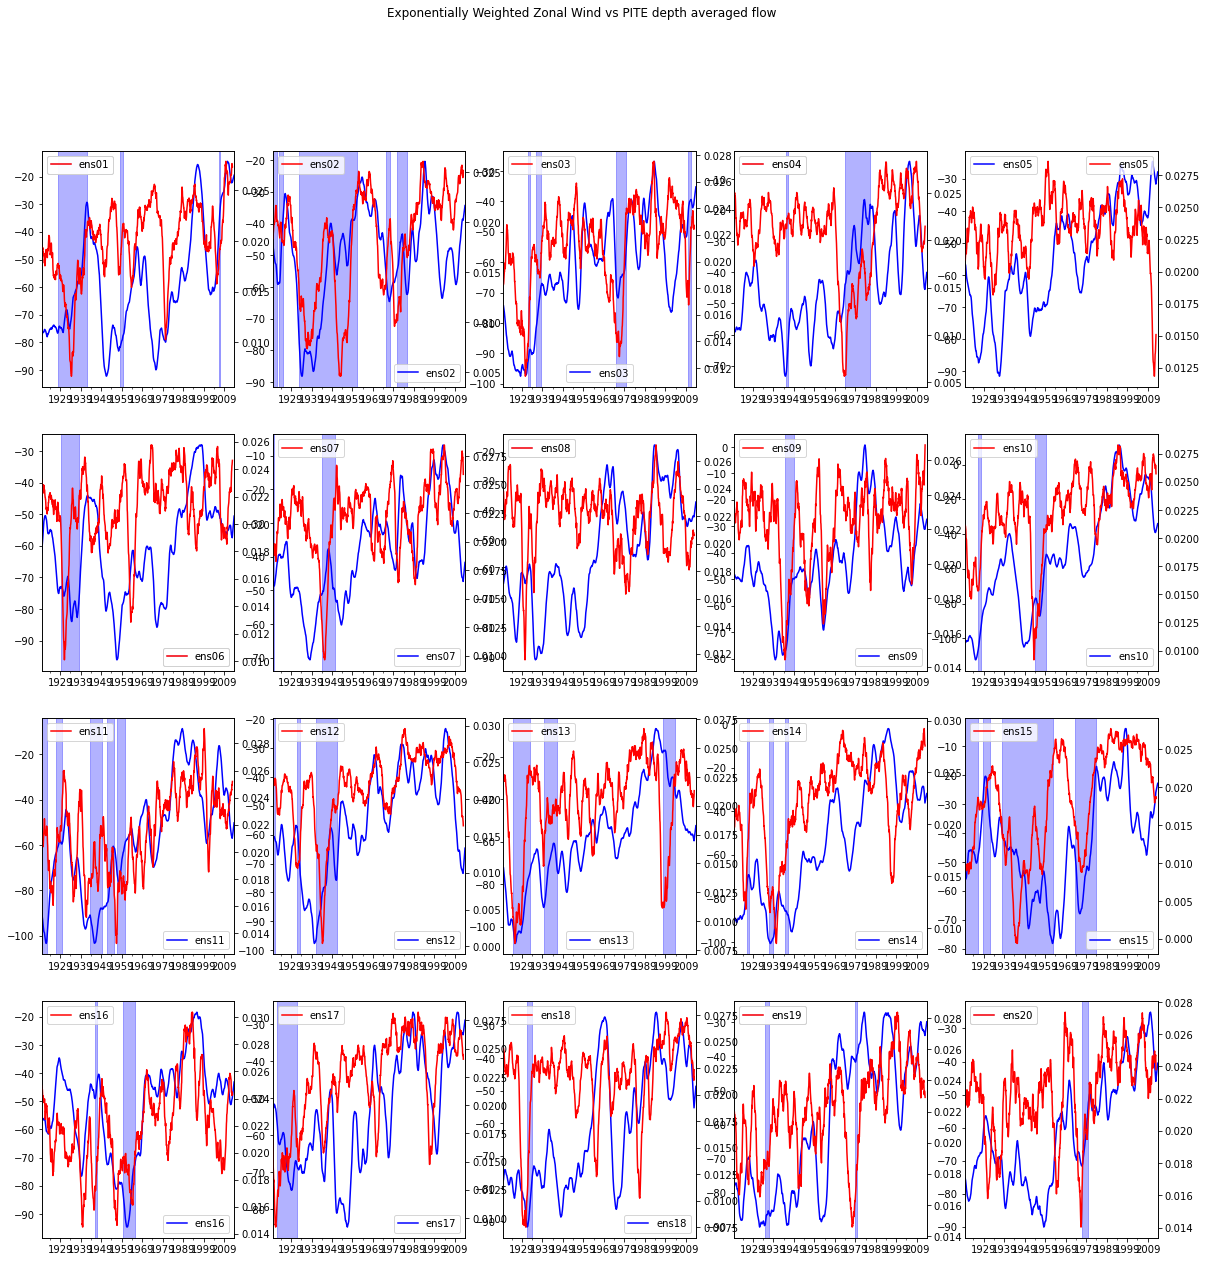

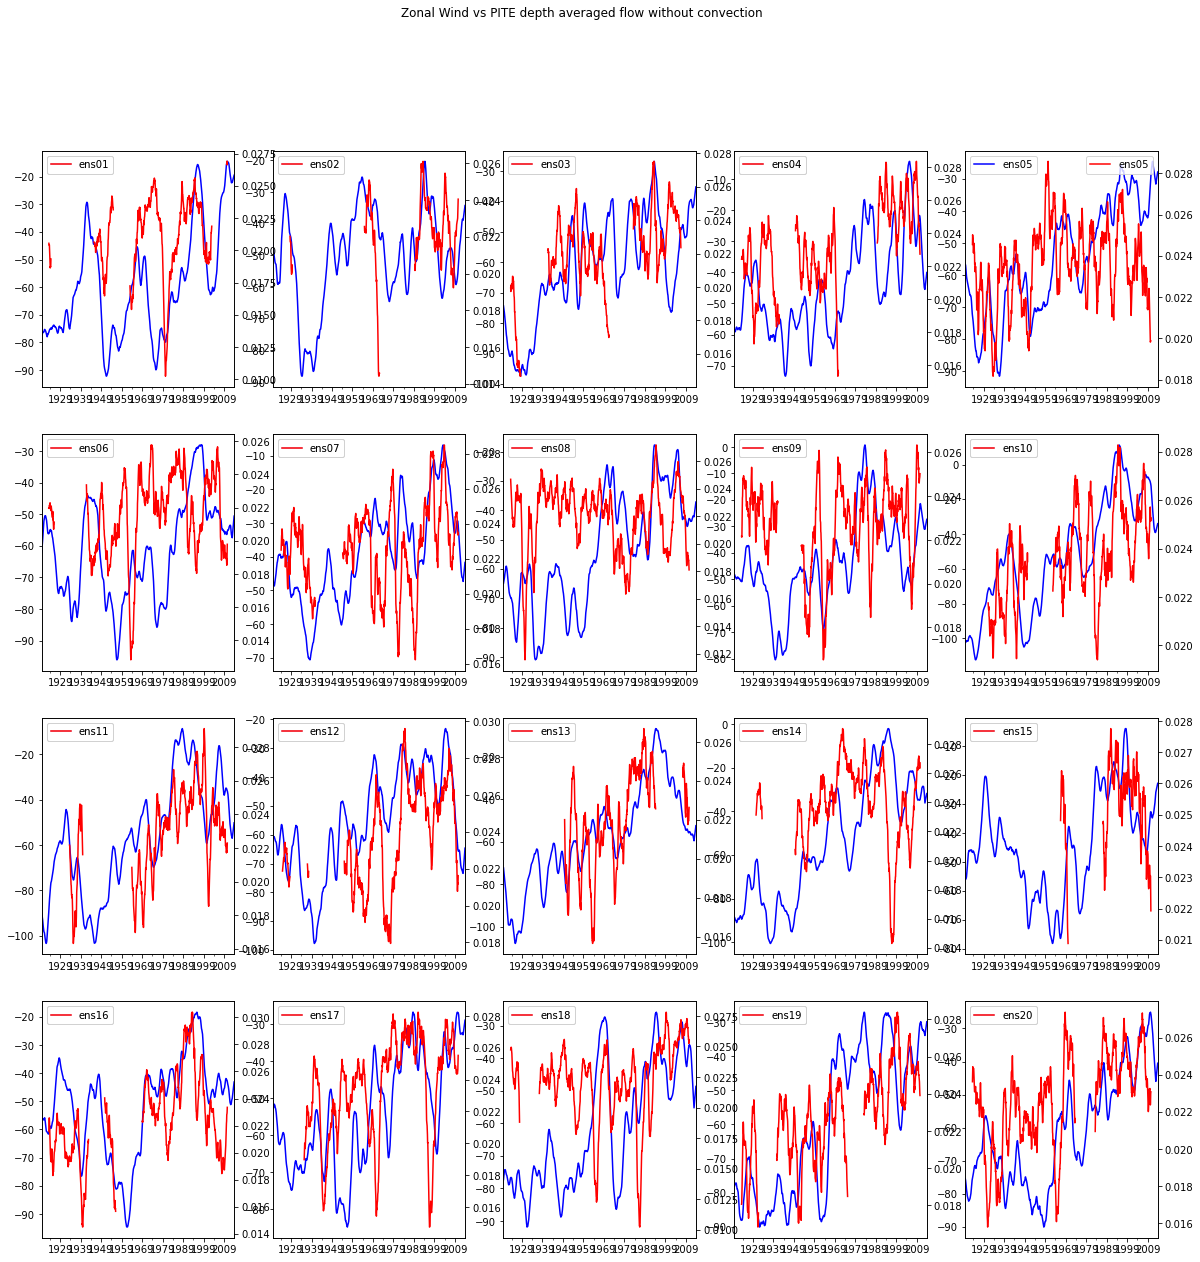

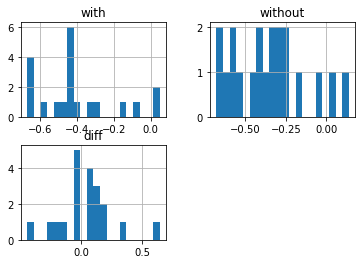

In [26]:
total['amundsen_shelf_break_uwind_avg'] = total['amundsen_shelf_break_uwind_avg'].reindex(sorted(total['amundsen_shelf_break_uwind_avg'].columns), axis=1)
total['amundsen_shelf_ohc_below_0m'] = total['amundsen_shelf_ohc_below_0m'].reindex(sorted(total['amundsen_shelf_ohc_below_0m'].columns), axis=1)

fig, ax=plt.subplots(4,5, figsize=(20,20))
fig.suptitle('Exponentially Weighted Zonal Wind vs PITE depth averaged flow')
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
(-1*total['PITE_full'].rolling(24, center=True).mean()['1920':'2013']).plot(subplots=True, ax=ax1, color='r')


choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    #total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']

k=0
for i in range(1,21):
    sel=convection['ens'+str(i).zfill(2)]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    ax[int(np.floor(i/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    ax[int(np.floor((i-1)/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)


fig, ax=plt.subplots(4,5, figsize=(20,20))
fig.suptitle('Zonal Wind vs PITE depth averaged flow without convection')
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
#total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
(-1*total['PITE_full'][convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013']).plot(subplots=True, ax=ax1, color='r')
                    
print('With Convection')
cors=pd.DataFrame()
cors['with']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].corrwith(
    total['PITE_full'].rolling(24, center=True).mean()['1920':'2013'])
cors['without']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].corrwith(
    total['PITE_full'][convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013'])
cors['diff']=cors['without']-cors['with']

cors.hist(bins=20)
cors


With Convection


with   without      diff
ens01 -0.189089 -0.293844 -0.104755
ens02 -0.243688 -0.222920  0.020768
ens03 -0.331018 -0.334345 -0.003327
ens04 -0.139696 -0.212196 -0.072500
ens05 -0.242258 -0.304653 -0.062395
ens06 -0.333528 -0.222533  0.110996
ens07 -0.255596 -0.092902  0.162694
ens08 -0.377781 -0.354367  0.023414
ens09 -0.231903 -0.170150  0.061753
ens10 -0.191303 -0.066378  0.124924
ens11 -0.295635 -0.136336  0.159298
ens12 -0.392594 -0.389255  0.003339
ens13 -0.170036 -0.267813 -0.097776
ens14 -0.321037 -0.117941  0.203096
ens15 -0.277921 -0.611281 -0.333360
ens16 -0.487386 -0.471019  0.016367
ens17 -0.502309 -0.586985 -0.084677
ens18 -0.116421 -0.049176  0.067244
ens19 -0.083552 -0.306773 -0.223221
ens20 -0.125420 -0.188892 -0.063473

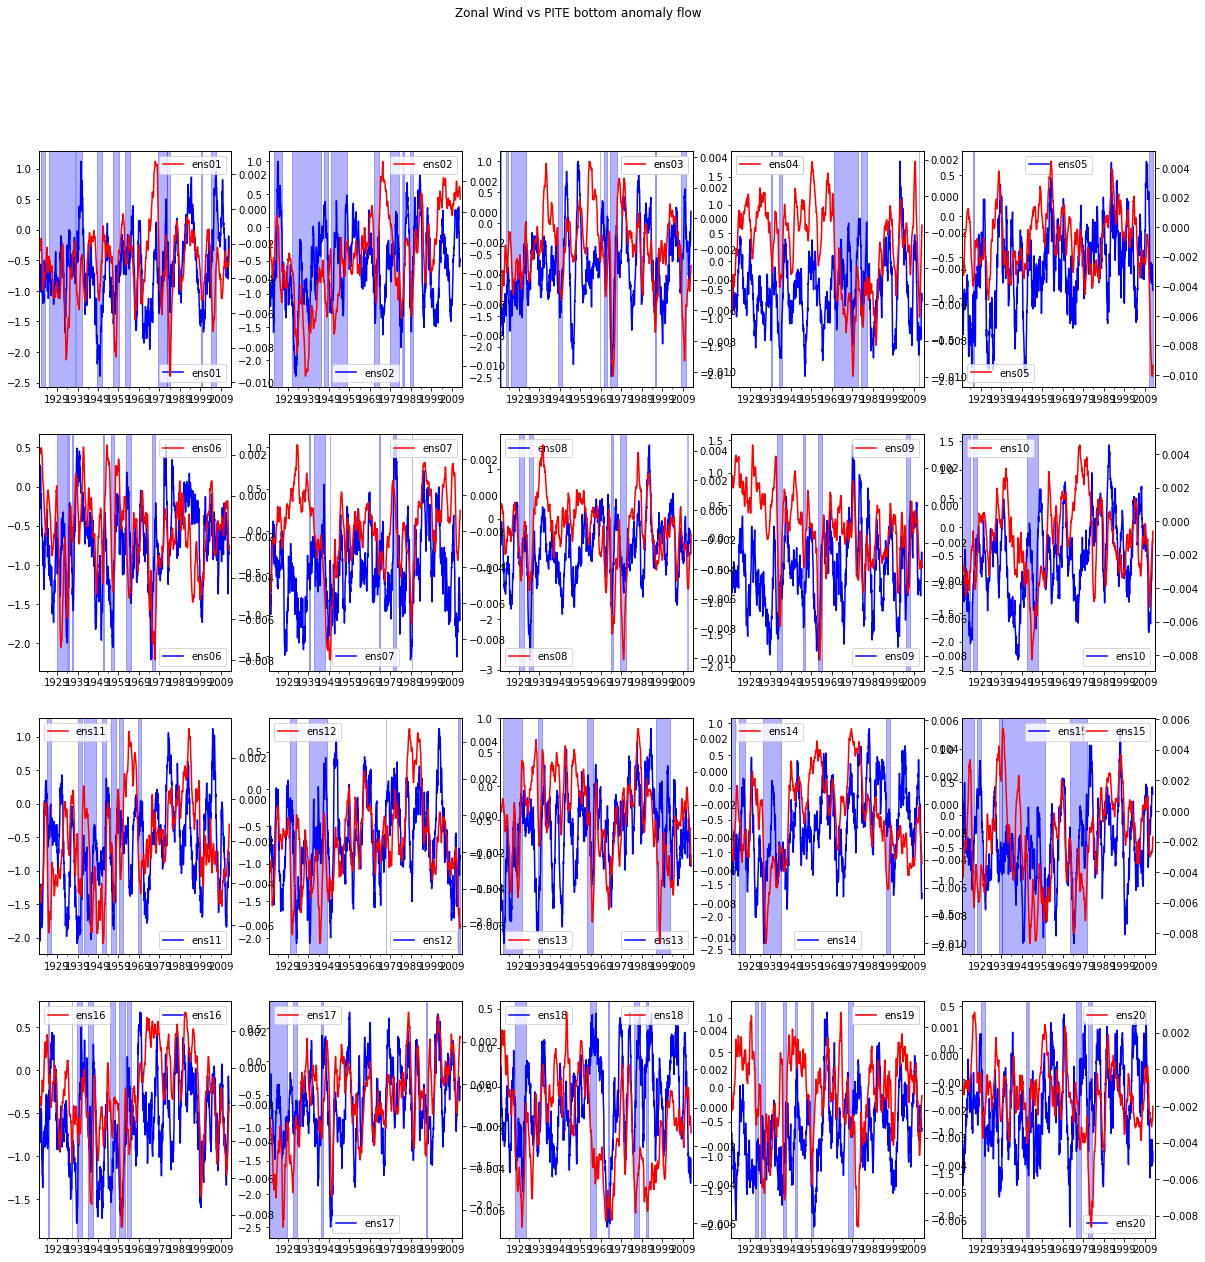

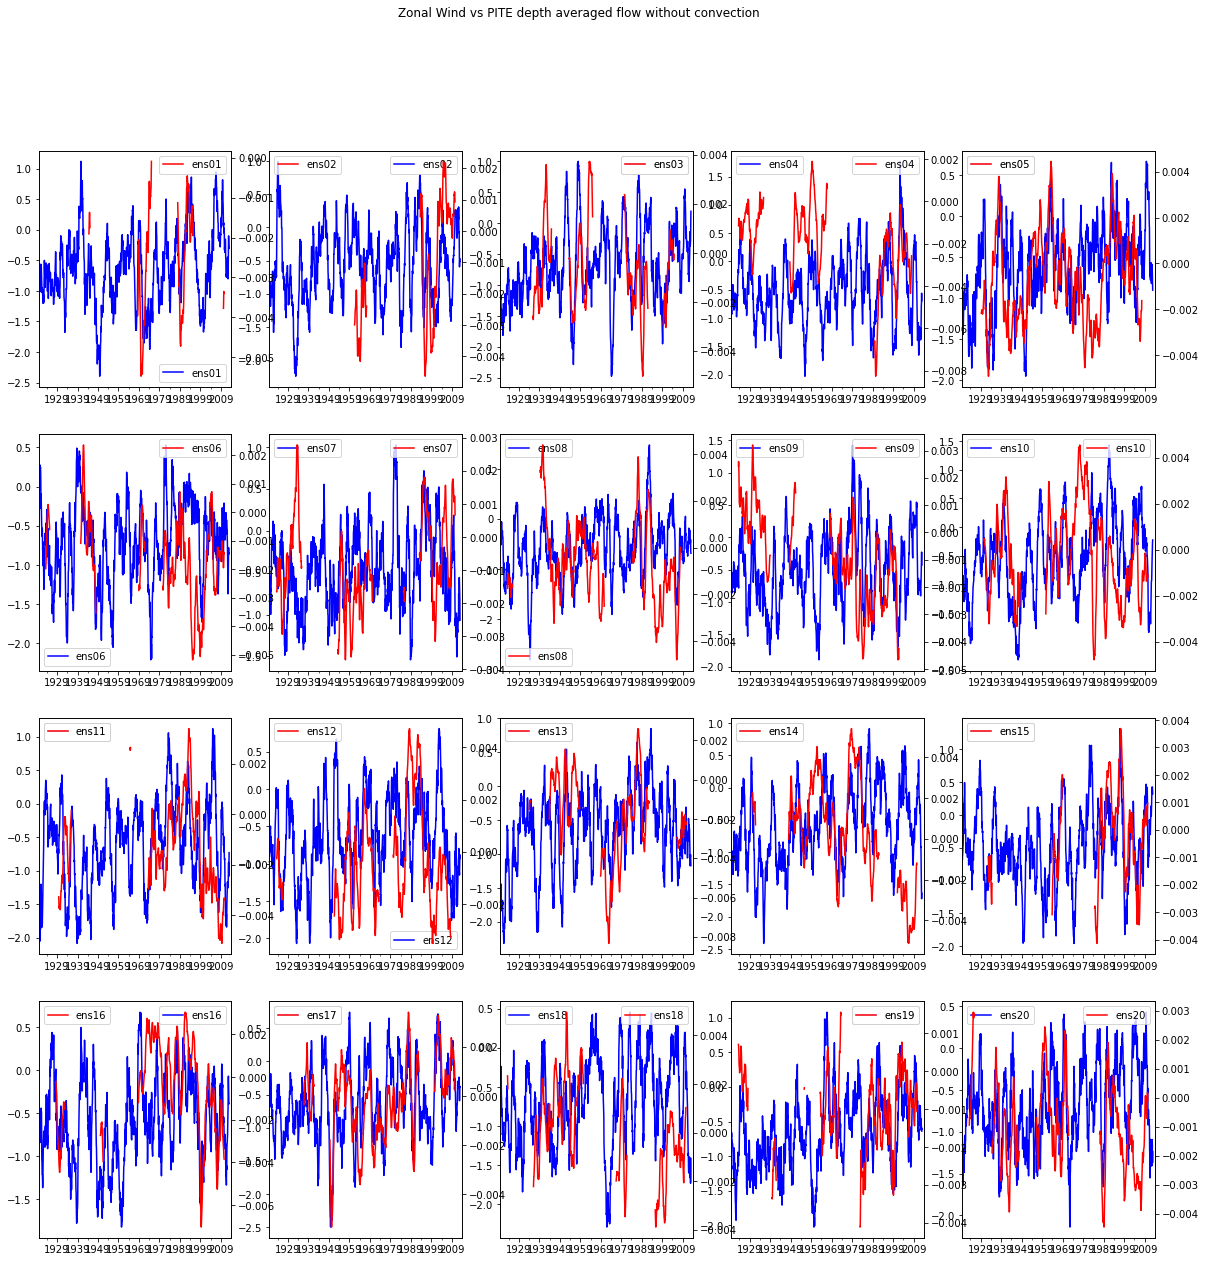

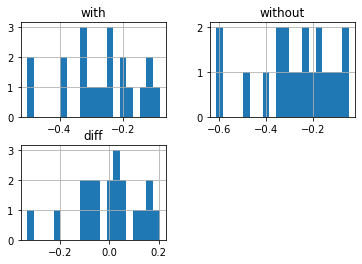

In [27]:
total['amundsen_shelf_break_uwind_avg'] = total['amundsen_shelf_break_uwind_avg'].reindex(sorted(total['amundsen_shelf_break_uwind_avg'].columns), axis=1)
total['amundsen_shelf_ohc_below_0m'] = total['amundsen_shelf_ohc_below_0m'].reindex(sorted(total['amundsen_shelf_ohc_below_0m'].columns), axis=1)

fig, ax=plt.subplots(4,5, figsize=(20,20))
fig.suptitle('Zonal Wind vs PITE bottom anomaly flow')
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
(-1*(total['PITEB_full']-total['PITE_full']).rolling(24, center=True).mean()['1920':'2013']).plot(subplots=True, ax=ax1, color='r')


choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='full':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']

k=0
for i in range(1,21):
    sel=convection['ens'+str(i).zfill(2)]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    ax[int(np.floor(i/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    ax[int(np.floor((i-1)/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)


fig, ax=plt.subplots(4,5, figsize=(20,20))
fig.suptitle('Zonal Wind vs PITE depth averaged flow without convection')
#total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean().ewm(halflife=12*5).sum()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].plot(subplots=True, ax=ax, color='b')
ax1=[i.twinx() for i in ax.flatten()]
(-1*(total['PITEB_full']-total['PITE_full'])[convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013']).plot(subplots=True, ax=ax1, color='r')
       

print('With Convection')
cors=pd.DataFrame()
cors['with']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].corrwith(
    (total['PITEB_full']-total['PITE_full']).rolling(24, center=True).mean()['1920':'2013'])
cors['without']=total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].corrwith(
    (total['PITEB_full']-total['PITE_full'])[convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013'])
cors['diff']=cors['without']-cors['with']

cors.hist(bins=20)
cors

# print(total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].corrwith(
#     (total['PITEB_full']-total['PITE_full']).rolling(24, center=True).mean()['1920':'2013']))
# print('Without:')
# print(total['amundsen_shelf_break_uwind_avg'].rolling(24, center=True).mean()['1920':'2013'].corrwith(
#     (total['PITEB_full']-total['PITE_full'])[convection.rolling(5*12, center=True).sum()==False].rolling(24, center=True).mean()['1920':'2013']))

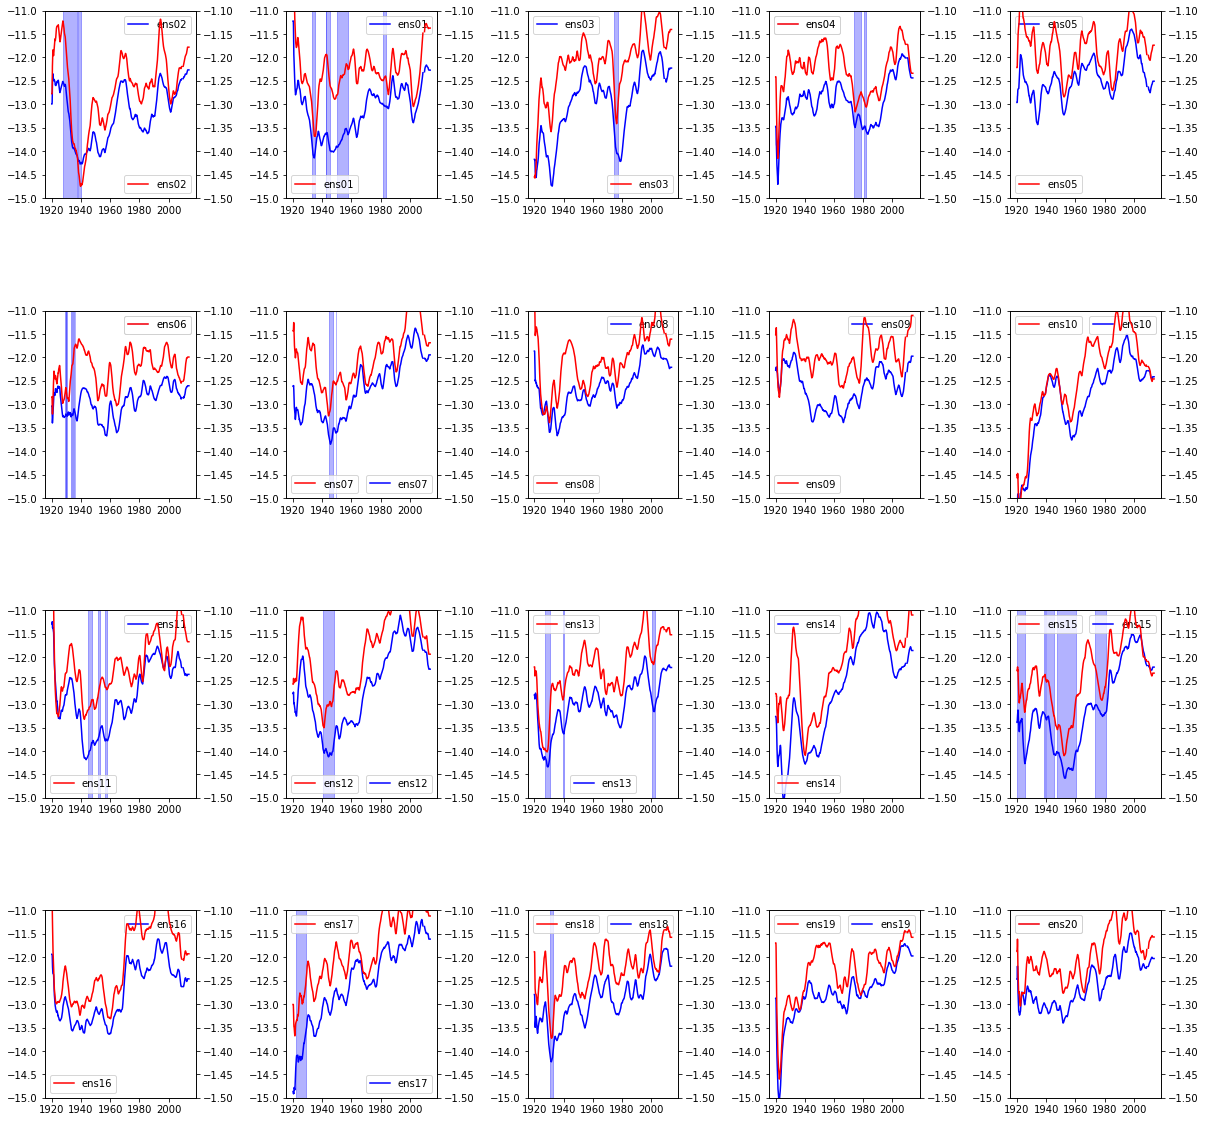

In [30]:
fig, ax=plt.subplots(4,5, figsize=(20,20))
total['amundsen_shelf_seaice_freeze'].rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'].plot(subplots=True, ax=ax, color='b', ylim=[-15,-11])
ax1=[i.twinx() for i in ax.flatten()]
total['pine_island_bay_seaice_freeze'].rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'].plot(subplots=True, ax=ax1, color='r', ylim=[-1.5, -1.1])

choose='full'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']

k=0
for i in range(1,21):
    sel=convection['ens'+str(i).zfill(2)]
    for j in range(len(sel)):
            if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                c=0
                while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                    c+=1
                if k==0:
                    ax[int(np.floor(i/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3, label='Convection Event')
                    k+=1
                else:
                    ax[int(np.floor((i-1)/5)), (i-1)%5].axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.3)

fig.subplots_adjust(hspace=0.6, wspace=0.6)
                    

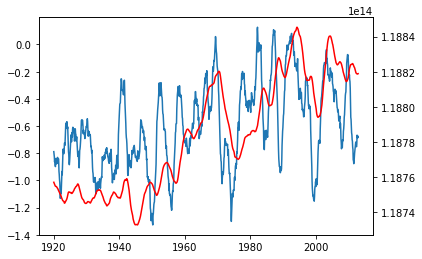

In [20]:
plt.figure()
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])
#plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])
plt.plot(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])

plt.twinx()
plt.plot(total['amundsen_shelf_ohc_below_0m']['1920':'2013'].index, total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'], c='r')


DatetimeIndex(['1920-01-01', '1920-02-01', '1920-03-01', '1920-04-01',
               '1920-05-01', '1920-06-01', '1920-07-01', '1920-08-01',
               '1920-09-01', '1920-10-01',
               ...
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01'],
              dtype='datetime64[ns]', length=1128, freq=None)

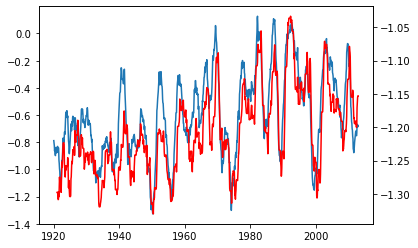

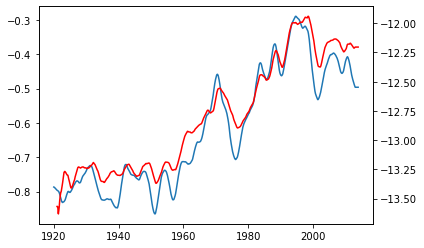

In [62]:
plt.figure()
plt.plot(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])
plt.twinx()
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'], c='r')
plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'], c='r')

total['pine_island_bay_seaice_freeze']=total['pine_island_bay_seaice_freeze'].sort_index()
total['amundsen_shelf_seaice_freeze']=total['amundsen_shelf_seaice_freeze'].sort_index()

plt.figure()
plt.plot(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
plt.twinx()
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
#plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'], c='r')
#plt.plot(total['pine_island_bay_seaice_freeze']['1920':'2013'].index, total['pine_island_bay_seaice_freeze'].mean(axis=1).rolling(12, center=True).mean().ewm(halflife=3).mean()['1920':'2013'], c='r')
plt.plot(total['amundsen_shelf_seaice_freeze']['1920':'2013'].index, total['amundsen_shelf_seaice_freeze'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*4).mean()['1920':'2013'], c='r')


total['pine_island_bay_seaice_freeze']['1920':'2013'].index

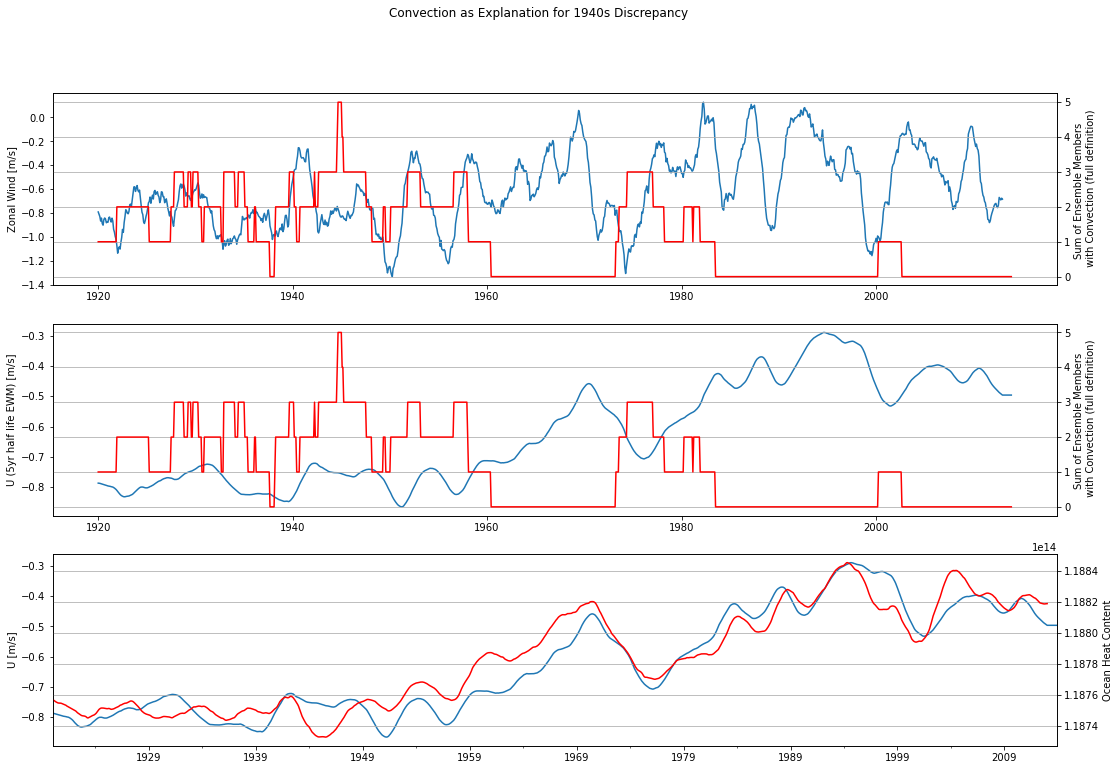

In [48]:
choose='full'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']

plt.figure(figsize=(18,12))
plt.suptitle('Convection as Explanation for 1940s Discrepancy')
plt.subplot(3,1,1)
plt.plot(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'])
plt.ylabel('Zonal Wind [m/s]')
plt.twinx()
plt.plot(convection.mean(axis=1)['1920':'2013'].index, convection.sum(axis=1)['1920':'2013'], c='r')
plt.ylabel('Sum of Ensemble Members \n with Convection (full definition)')
plt.grid()

plt.subplot(3,1,2)
plt.plot(total['amundsen_shelf_break_uwind_avg']['1920':'2013'].index, total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'])
plt.ylabel('U (5yr half life EWM) [m/s]')
plt.twinx()
plt.plot(convection.mean(axis=1)['1920':'2013'].index, convection.sum(axis=1)['1920':'2013'], c='r')
plt.ylabel('Sum of Ensemble Members \n with Convection (full definition)')
plt.grid()

plt.subplot(3,1,3)
total['amundsen_shelf_break_uwind_avg'].mean(axis=1).rolling(24, center=True).mean().ewm(halflife=12*5).mean()['1920':'2013'].plot()
plt.ylabel('U [m/s]')
plt.twinx()
total['amundsen_shelf_ohc_below_0m'].mean(axis=1).rolling(24, center=True).mean()['1920':'2013'].plot(c='r')
plt.ylabel('Ocean Heat Content')
plt.grid()


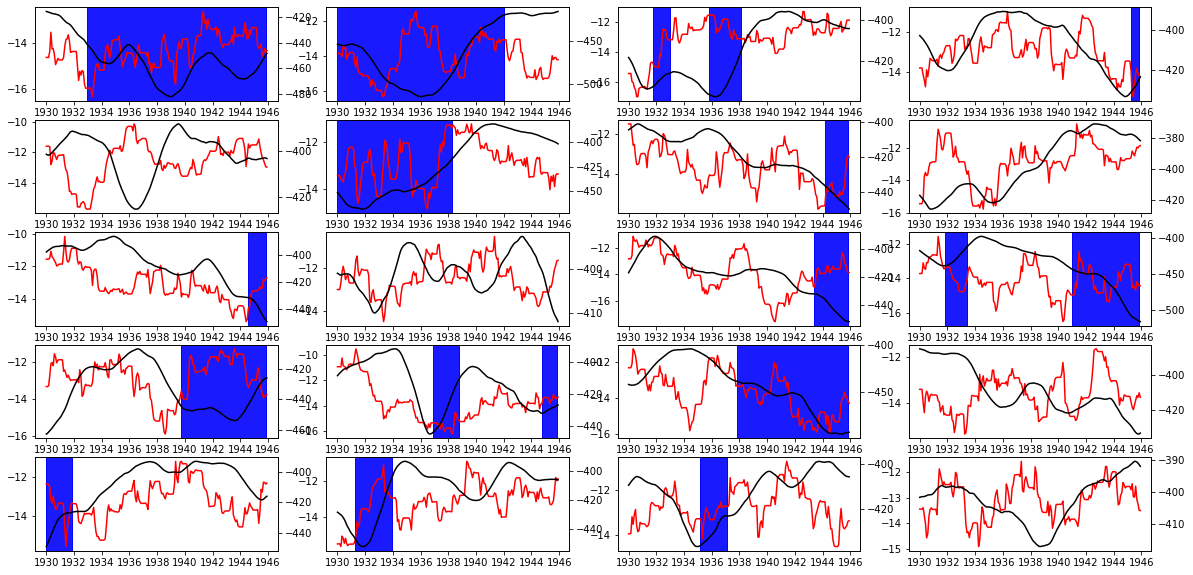

In [75]:
choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    #total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']


plt.figure(figsize=(20,10))
for i, ens in enumerate(total['amundsen_shelf_seaice_freeze'].columns):
    plt.subplot(5,4,i+1)
    plt.plot(total['amundsen_shelf_seaice_freeze']['1930':'1945'].index, total['amundsen_shelf_seaice_freeze'][ens].rolling(24, center=True).mean()['1930':'1945'], c='r')
    
    k=0
    for i in range(1,21):
        sel=convection[ens]['1930':'1945']
        for j in range(len(sel)):
                if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                    c=0
                    while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                        c+=1
                    if k==0:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1, label='Convection Event')
                        k+=1
                    else:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1)
    
    plt.twinx()
    plt.plot(total['amundsen_shelf_isotherm_0.5C_below_100m']['1930':'1945'].index, total['amundsen_shelf_isotherm_0.5C_below_100m'][ens].rolling(24, center=True).mean()['1930':'1945'], c='k')



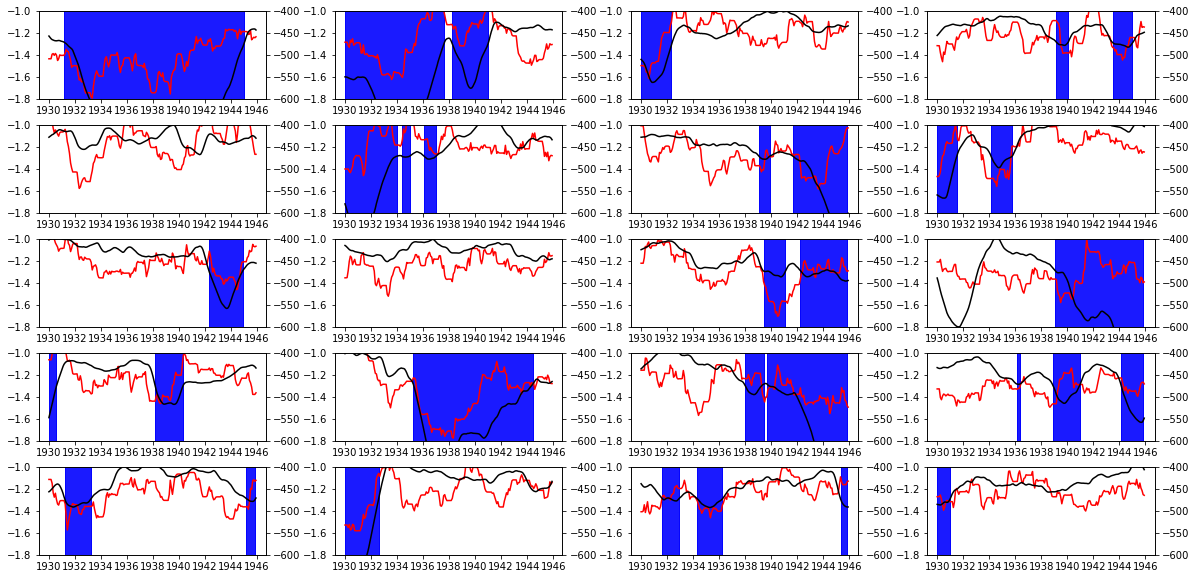

In [82]:
choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']


plt.figure(figsize=(20,10))
for i, ens in enumerate(total['amundsen_shelf_seaice_freeze'].columns):
    plt.subplot(5,4,i+1)
    plt.plot(total['pine_island_bay_seaice_freeze']['1930':'1945'].index, total['pine_island_bay_seaice_freeze'][ens].rolling(24, center=True).mean()['1930':'1945'], c='r')
    plt.ylim([-1.8, -1])
    
    k=0
    for i in range(1,21):
        sel=convection[ens]['1930':'1945']
        for j in range(len(sel)):
                if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                    c=0
                    while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                        c+=1
                    if k==0:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1, label='Convection Event')
                        k+=1
                    else:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1)
    
    plt.twinx()
    plt.plot(total['pine_island_bay_isotherm_0C_below_100m']['1930':'1945'].index, total['pine_island_bay_isotherm_0C_below_100m'][ens].rolling(24, center=True).mean()['1930':'1945'], c='k')
    plt.ylim([-600, -400])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

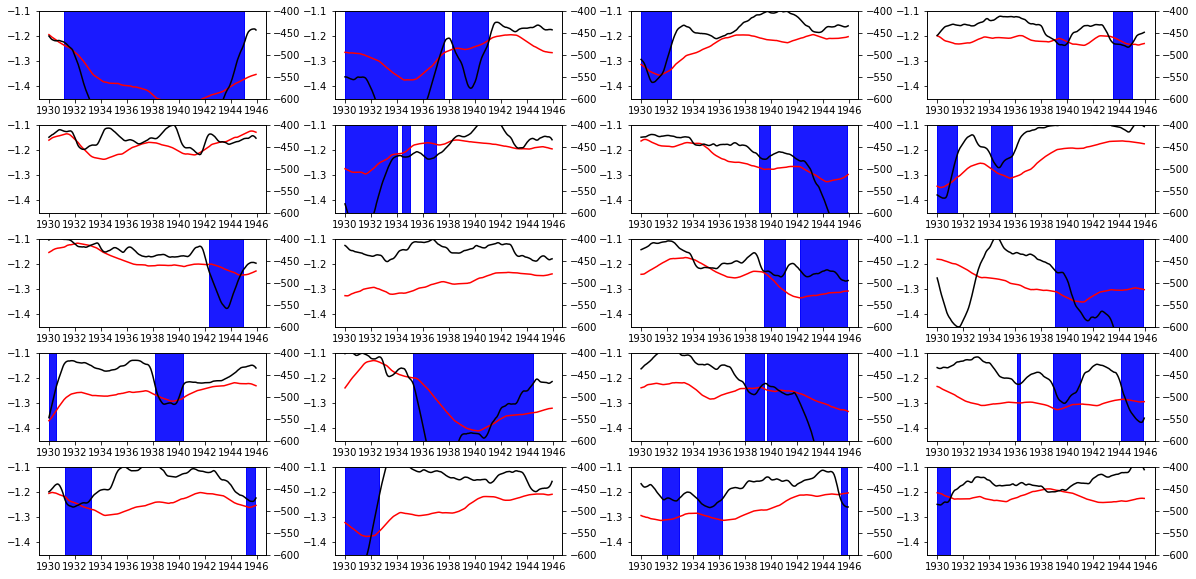

In [86]:
choose='only'
if choose=='full':
    title='\n Selecting convection based on Definition Naughten'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470) & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)
elif choose=='only':
    title='\n Selecting convection based on Isotherms in PIB'
    convection=(
                    #total[ 'amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24).mean()<-430 #| 
                    total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470#/600 
                    #total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430
                    )
if choose=='two':
    title='\n Selecting convection based on Isotherms in PIB and Amundsen Shelf'
    convection=(total['amundsen_shelf_isotherm_0.5C_below_100m'].rolling(24, center=True).mean()<-440) & (total['pine_island_bay_isotherm_0C_below_100m'].rolling(24, center=True).mean()<-470)# & (total['dotson_bay_isotherm_-1C_below_100m'].rolling(24, center=True).mean()<-430)

convection=convection['1920':'2013']


plt.figure(figsize=(20,10))
for i, ens in enumerate(total['amundsen_shelf_seaice_freeze'].columns):
    plt.subplot(5,4,i+1)
    plt.plot(total['pine_island_bay_seaice_freeze']['1930':'1945'].index, total['pine_island_bay_seaice_freeze'][ens].rolling(24, center=True).mean().ewm(halflife=5*12).mean()['1930':'1945'], c='r')
    plt.ylim([-1.45, -1.1])
    
    k=0
    for i in range(1,21):
        sel=convection[ens]['1930':'1945']
        for j in range(len(sel)):
                if (sel.iloc[j]==True) & (sel.iloc[j-1]==False):
                    c=0
                    while (sel.iloc[j+c]==True) & ((j+c+1)<len(sel)):
                        c+=1
                    if k==0:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1, label='Convection Event')
                        k+=1
                    else:
                        plt.axvspan(sel.index[j], sel.index[j+c-1], color='blue', alpha=0.1)
    
    plt.twinx()
    plt.plot(total['pine_island_bay_isotherm_0C_below_100m']['1930':'1945'].index, total['pine_island_bay_isotherm_0C_below_100m'][ens].rolling(24, center=True).mean()['1930':'1945'], c='k')
    plt.ylim([-600, -400])
plt.subplots_adjust(hspace=0.3, wspace=0.3)